In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('train.csv',index_col=0)

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


### NaN ersetzen in Age

In [5]:
agemean=df.groupby(by=['Sex'])['Age'].transform('median')

In [6]:
agemean

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64

In [7]:
df=df.fillna({'Age':agemean})

In [8]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S


### Cabin auffüllen mit fillna

In [9]:
new=df['Cabin'].fillna(method='ffill')

In [10]:
df=df.fillna({'Cabin':new})

In [11]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,B42,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     890 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Binning Age

In [13]:
df['Age']=pd.qcut(df['Age'],3,labels=['Old','middle','Young'])

In [14]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,Old,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Young,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,middle,0,0,STON/O2. 3101282,7.9250,C85,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,Young,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,middle,0,0,211536,13.0000,C50,S
888,1,1,"Graham, Miss. Margaret Edith",female,Old,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,middle,1,2,W./C. 6607,23.4500,B42,S


### One Hot encoding Embarked

In [15]:
pd.get_dummies(df['Embarked'],prefix='Embarked',drop_first=True)

,Embarked_Q,Embarked_S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1
...,...,...
887,0,1
888,0,1
889,0,1


In [16]:
df[['Q','S']]=pd.get_dummies(df['Embarked'],drop_first=True)

In [17]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,Old,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Young,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,middle,0,0,STON/O2. 3101282,7.9250,C85,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young,1,0,113803,53.1000,C123,S,0,1
5,0,3,"Allen, Mr. William Henry",male,Young,0,0,373450,8.0500,C123,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,middle,0,0,211536,13.0000,C50,S,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,Old,0,0,112053,30.0000,B42,S,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,middle,1,2,W./C. 6607,23.4500,B42,S,0,1


### Train,test,split -> Pclass and SibSp 

In [18]:
x=df[['Pclass','SibSp']]
y=df['Survived']

In [19]:
x.shape,y.shape

((891, 2), (891,))

In [20]:
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [21]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((712, 2), (179, 2), (712,), (179,))

In [22]:
model = LogisticRegression()

In [23]:
model.fit(Xtrain,ytrain)

LogisticRegression()

In [24]:
w_1=model.coef_[0][0]
w_2=model.coef_[0][1]
w_0=model.intercept_[0]

In [25]:
print('model coeffizients=',w_1,'and',w_2, 'the model intercept is',w_0)

model coeffizients= -0.8919141074561224 and -0.003827510839926719 the model intercept is 1.5046478517263817


In [26]:
print(f'LogisticRegression : train: {round(model.score(Xtrain,ytrain),3)}, test: {round(model.score(Xtest,ytest),3)}')

LogisticRegression : train: 0.684, test: 0.659


In [27]:
threshold = -w_0/w_1
print(f'threshold corrisponding to the probability p ={threshold} ')

threshold corrisponding to the probability p =1.686987389422364 


In [30]:
ypred=model.predict(x)
accuracy_score(y,ypred)

0.6790123456790124

##### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)
y_pred1 = rf.predict(Xtest)

In [33]:
Xtest[:5]

,Pclass,SibSp
PassengerId,,
863,1,0
224,3,0
85,2,0
681,3,0
536,2,0


In [34]:
y_pred1[:5], ytest[:5]

(array([1, 0, 0, 0, 0], dtype=int64),
 PassengerId
 863    1
 224    0
 85     1
 681    0
 536    1
 Name: Survived, dtype: int64)

In [35]:
print (f'Random Forest: train: {round(rf.score(Xtrain,ytrain),3)}, test: {round(rf.score(Xtest,ytest),3)}')

Random Forest: train: 0.698, test: 0.654


In [36]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,Old,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Young,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,middle,0,0,STON/O2. 3101282,7.9250,C85,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young,1,0,113803,53.1000,C123,S,0,1
5,0,3,"Allen, Mr. William Henry",male,Young,0,0,373450,8.0500,C123,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,middle,0,0,211536,13.0000,C50,S,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,Old,0,0,112053,30.0000,B42,S,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,middle,1,2,W./C. 6607,23.4500,B42,S,0,1


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

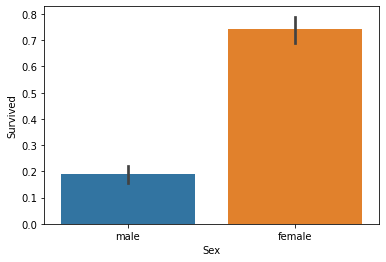

In [37]:
sns.barplot (x='Sex',y='Survived',data=df)

<AxesSubplot:>

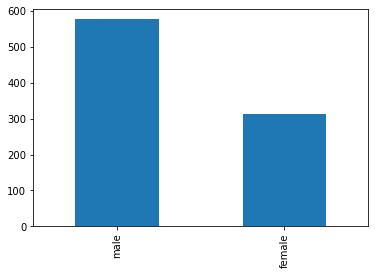

In [38]:
df['Sex'].value_counts().plot(kind='bar')

In [39]:
dfmen=df.loc[df['Survived']==1]

In [40]:
dfmen

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
PassengerId,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Young,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",female,middle,0,0,STON/O2. 3101282,7.9250,C85,S,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Young,1,0,113803,53.1000,C123,S,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,middle,0,2,347742,11.1333,E46,S,0,1
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Old,1,0,237736,30.0708,E46,C,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,Old,0,0,2667,7.2250,B51 B53 B55,C,0,0
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,Young,0,1,11767,83.1583,C50,C,0,0
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,Old,0,1,230433,26.0000,C50,S,0,1


<AxesSubplot:>

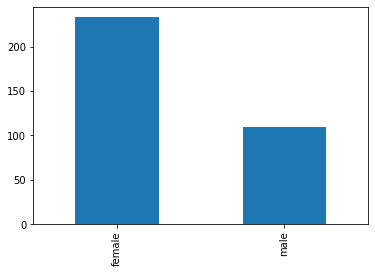

In [41]:
dfmen['Sex'].value_counts().plot(kind='bar')

#### New------------------------------------------------------------------------------------------------------------

In [42]:
df1=pd.read_csv('train.csv',index_col=0)

## Cross Validation

In [43]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [44]:
agemean1=df1.groupby(by=['Sex'])['Age'].transform('median')

In [45]:
agemean1

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64

In [46]:
df1=df1.fillna({'Age':agemean})

In [47]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S


In [48]:
X=df1 [['Age','Sex']]
y=df1 ['Survived']

In [49]:
X

,Age,Sex
PassengerId,,
1,22.0,male
2,38.0,female
3,26.0,female
4,35.0,female
5,35.0,male
...,...,...
887,27.0,male
888,19.0,female
889,27.0,female


In [50]:
X.shape,y.shape

((891, 2), (891,))

In [51]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=1)

In [52]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((712, 2), (179, 2), (712,), (179,))

In [53]:
Xtrain

,Age,Sex
PassengerId,,
302,29.0,male
310,30.0,female
517,34.0,female
121,21.0,male
571,62.0,male
...,...,...
716,19.0,male
768,30.5,female
73,21.0,male


In [54]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 302 to 38
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     712 non-null    float64
 1   Sex     712 non-null    object 
dtypes: float64(1), object(1)
memory usage: 16.7+ KB


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score

In [56]:
import sklearn
print(sklearn.__version__)

0.24.1


In [57]:
scaler = MinMaxScaler()

In [58]:
aged_scaled_train = scaler.fit_transform(Xtrain[['Age']])
aged_scaled_train

array([[0.35913546],
       [0.37170143],
       [0.42196532],
       [0.25860769],
       [0.77381252],
       [0.35913546],
       [0.22090978],
       [0.35913546],
       [0.22090978],
       [0.35913546],
       [0.54762503],
       [0.35913546],
       [0.560191  ],
       [0.33400352],
       [0.18321186],
       [0.10781603],
       [0.4722292 ],
       [0.35913546],
       [0.23347575],
       [0.30258859],
       [0.88690626],
       [0.2083438 ],
       [0.66071877],
       [0.35913546],
       [0.28373963],
       [0.45966323],
       [0.2963056 ],
       [0.63558683],
       [0.30887158],
       [0.35913546],
       [0.45966323],
       [0.39683338],
       [0.04498618],
       [0.35285248],
       [0.13294798],
       [0.39683338],
       [0.43453129],
       [0.35913546],
       [0.2083438 ],
       [0.40939935],
       [0.69841669],
       [0.35913546],
       [0.35913546],
       [0.6481528 ],
       [0.52249309],
       [0.35913546],
       [0.61045489],
       [0.233

In [59]:
aged_scaled_train=pd.DataFrame(data=aged_scaled_train,columns=['Age'])

In [60]:
aged_scaled_train

,Age
0,0.359135
1,0.371701
2,0.421965
3,0.258608
4,0.773813
...,...
707,0.233476
708,0.377984
709,0.258608
710,0.334004


##### One Hot Encoding

In [61]:
ohe = OneHotEncoder(drop='first')

In [62]:
sex_ohe_train = ohe.fit_transform(Xtrain[['Sex']])
sex_ohe_train.todense()

matrix([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [63]:
sex_ohe_train.todense=pd.DataFrame(data=sex_ohe_train.todense(),columns=['Sex'])

In [64]:
sex_ohe_train.todense

,Sex
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
707,1.0
708,0.0
709,1.0
710,0.0


In [65]:
def concat_df_fe(df1,df2):
    
    return  pd.concat([df1,df2],axis=1)

#### Concatenate

In [66]:
Xtrain_fe = concat_df_fe(df1=aged_scaled_train, df2=sex_ohe_train.todense)



In [67]:
Xtrain_fe

,Age,Sex
0,0.359135,1.0
1,0.371701,0.0
2,0.421965,0.0
3,0.258608,1.0
4,0.773813,1.0
...,...,...
707,0.233476,1.0
708,0.377984,0.0
709,0.258608,1.0
710,0.334004,0.0


#### Same with Test Data

In [68]:
aged_scaled_test = scaler.transform(Xtest[['Age']])
aged_scaled_test = pd.DataFrame(data=aged_scaled_test, columns=['Age'])
aged_scaled_test

,Age
0,0.597889
1,0.359135
2,0.208344
3,0.334004
4,0.082684
...,...
174,0.610455
175,0.359135
176,0.359135
177,0.258608


In [69]:
sex_ohe_test = ohe.transform(Xtest[['Sex']]) 

In [70]:
sex_ohe_test = pd.DataFrame(data=sex_ohe_test.todense(), columns=['Sex'])
sex_ohe_test

,Sex
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
174,0.0
175,1.0
176,1.0
177,1.0


In [71]:
Xtest_fe = concat_df_fe(df1=aged_scaled_test, df2=sex_ohe_test)
Xtest_fe

,Age,Sex
0,0.597889,0.0
1,0.359135,1.0
2,0.208344,0.0
3,0.334004,0.0
4,0.082684,0.0
...,...,...
174,0.610455,0.0
175,0.359135,1.0
176,0.359135,1.0
177,0.258608,1.0


### Build Model

In [72]:
lr = LogisticRegression(class_weight='balanced')

In [73]:
lr.fit(Xtrain_fe,ytrain)

LogisticRegression(class_weight='balanced')

In [74]:
print(f'The train Accuracy of the logistic regression is {round(lr.score(Xtrain_fe,ytrain),3)}') 

The train Accuracy of the logistic regression is 0.789


In [75]:
print(f'The Test Accuracy of the logistic regression is {round(lr.score(Xtest_fe,ytest),3)}')

The Test Accuracy of the logistic regression is 0.777


#### Cross Validation

In [76]:
cross_validation_lr = cross_val_score(estimator=lr,
                                     X=Xtrain_fe,
                                     y=ytrain,
                                     scoring='accuracy',
                                      cv=5,
                                     verbose=3) 



[CV] END ................................ score: (test=0.741) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.0s
[CV] END ................................ score: (test=0.817) total time=   0.0s
[CV] END ................................ score: (test=0.824) total time=   0.0s
[CV] END ................................ score: (test=0.789) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [77]:
print(f'Validation accuracy scores: {np.round(cross_validation_lr,2)}')
print(f'\nmean: {cross_validation_lr.mean():.2}')
print(f'std: {cross_validation_lr.std():.2}')

Validation accuracy scores: [0.74 0.78 0.82 0.82 0.79]

mean: 0.79
std: 0.03


# Column Transformer and Pipeline / Feature Engineering

In [78]:
df2=pd.read_csv('train.csv',index_col=0)

In [79]:
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#NEW
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [82]:
set_config(display='diagram')

In [83]:
sex_to_impute = df2[df2['Sex'].isna()]
sex_to_impute

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [85]:
agemean=df2.groupby(by=['Sex'])['Age'].transform('median')

In [86]:
agemean

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64

In [87]:
df2=df2.fillna({'Age':agemean})

In [88]:
df2[df2['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [89]:
emb = df2['Embarked'].mode()[0]

In [90]:
df2 = df2.fillna({"Embarked":emb})

In [91]:
df2[df2['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


Features for the model

In [92]:
X=df2[['Sex','Embarked','Age','Pclass']]
y=df2 ['Survived']

Train,Test,split

In [93]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state= 1)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((712, 4), (179, 4), (712,), (179,))

In [94]:
Xtrain

,Sex,Embarked,Age,Pclass
PassengerId,,,,
302,male,Q,29.0,3
310,female,C,30.0,1
517,female,S,34.0,2
121,male,S,21.0,2
571,male,S,62.0,2
...,...,...,...,...
716,male,S,19.0,3
768,female,Q,30.5,3
73,male,S,21.0,2


Categorical and numeric features

In [95]:
categorical_col=Xtrain.select_dtypes(include='object').columns
numeric_col=Xtrain.select_dtypes(include='number').columns

In [96]:
categorical_col

Index(['Sex', 'Embarked'], dtype='object')

In [97]:
numeric_col

Index(['Age', 'Pclass'], dtype='object')

Transformer definition

In [98]:
transformers=[('ohe',OneHotEncoder(drop='first'),['Sex','Embarked','Pclass']),
             ('scaler',RobustScaler(),['Age']),
             ('binning',KBinsDiscretizer(n_bins=6,encode='onehot',strategy='uniform'),['Age'])]

define column transformer

In [99]:
column_transformer=ColumnTransformer(transformers=transformers,remainder='drop')

fit&transform the column transformer Only Xtrain

In [100]:
Xtrain_ft=column_transformer.fit_transform(Xtrain,ytrain)

transform Xtest

In [101]:
Xtest_ft=column_transformer.transform(Xtest)

In [102]:
column_transformer

ColumnTransformer(transformers=[('ohe', OneHotEncoder(drop='first'),
                                 ['Sex', 'Embarked', 'Pclass']),
                                ('scaler', RobustScaler(), ['Age']),
                                ('binning',
                                 KBinsDiscretizer(n_bins=6, strategy='uniform'),
                                 ['Age'])])

back to Dataframe

In [103]:
Xtrain_ft = pd.DataFrame(Xtrain_ft)
Xtrain_ft

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.357143,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,-0.571429,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,2.357143,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.0,1.0,0.0,1.0,-0.714286,0.0,1.0,0.0,0.0,0.0,0.0
708,0.0,1.0,0.0,0.0,1.0,0.107143,0.0,0.0,1.0,0.0,0.0,0.0
709,1.0,0.0,1.0,1.0,0.0,-0.571429,0.0,1.0,0.0,0.0,0.0,0.0
710,0.0,0.0,1.0,0.0,1.0,-0.142857,0.0,0.0,1.0,0.0,0.0,0.0


### Decision Tree/Random Forest

In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#ohe=OneHotEncoder(drop='first')

In [ ]:
#sexohe=ohe.fit_transform([['Sex']])

In [ ]:
#np.array(sexohe.todense())

In [ ]:
#sexohe=pd.DataFrame(data=sexohe,columns=['Sex'])